CS 282 (Computer Vision) <br>
Programming Assignment 1 <br>
OpenCV Exercises <br>
Image Enhancement <br>

Professor: Dr. Prospero C. Naval Jr. <br>
Student: Deomary Angelo B. Franco, 202322049 <br>


In [2]:
import cv2
import logging
import matplotlib.pyplot as plt
import numpy as np
import os


logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(message)s'
)

logging.info("OpenCV version: %s", cv2.__version__)

2026-02-08 23:22:59,275 - OpenCV version: 4.11.0


# Item 1
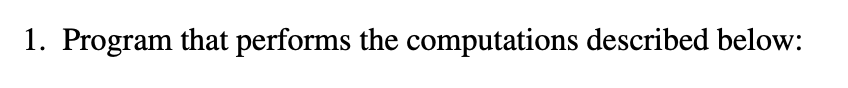

## (a)
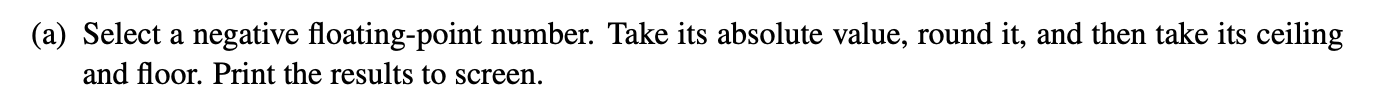

In [3]:
negative_floating_point_number = -2.72
logging.info(f'Negative floating point number: {negative_floating_point_number}')

absolute_value = cv2.absdiff(negative_floating_point_number, 0.0)[0][0]
logging.info(f'Absolute value: {absolute_value}')

ceiling_value = cv2.convertScaleAbs(negative_floating_point_number)[0][0]
logging.info(f'Ceiling value: {ceiling_value}')

floor = ceiling_value - 1
logging.info(f'Floor value: {floor}')

2026-02-08 23:22:59,279 - Negative floating point number: -2.72
2026-02-08 23:22:59,280 - Absolute value: 2.72
2026-02-08 23:22:59,280 - Ceiling value: 3
2026-02-08 23:22:59,280 - Floor value: 2


## (b)
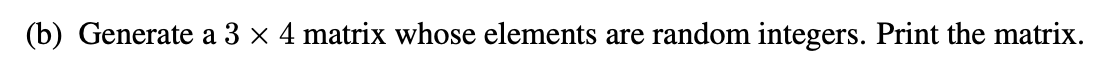

In [4]:
matrix_3x4 = cv2.randu(np.ones((3, 4), dtype=np.uint8), 0, 10)
logging.info(f'3x4 Matrix:\n{matrix_3x4}')
logging.info(f'Matrix shape: {matrix_3x4.shape}')
logging.info(f'Matrix data type: {matrix_3x4.dtype}')

2026-02-08 23:22:59,285 - 3x4 Matrix:
[[6 7 9 9]
 [7 0 6 3]
 [6 9 1 8]]
2026-02-08 23:22:59,285 - Matrix shape: (3, 4)
2026-02-08 23:22:59,286 - Matrix data type: uint8


## (c)
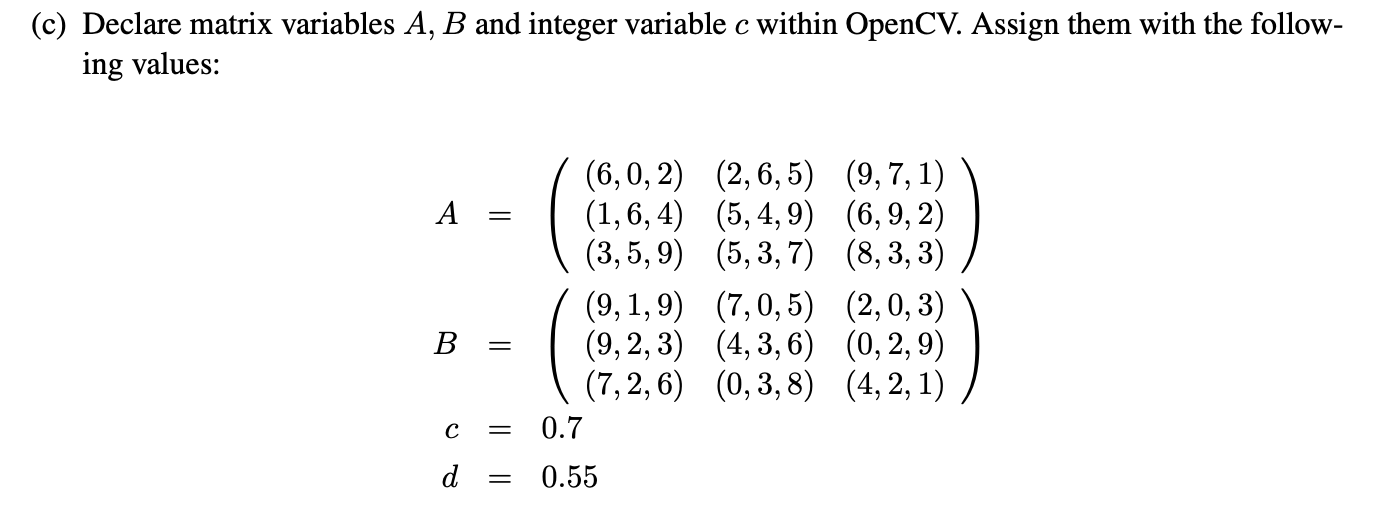

In [5]:
A_ = np.array([
    [[6, 0, 2], [2, 6, 5], [9, 7, 1]],
    [[1, 6, 4], [5, 4, 9], [6, 9, 2]],
    [[3, 5, 9], [5, 3, 7], [8, 3, 3]],
], dtype=np.float32)

A = cv2.Mat(A_)
logging.info(f'3x3x3 Matrix A:\n{A}')

B_ = np.array([
    [[9, 1, 9], [7, 0, 5], [2, 0, 3]],
    [[9, 2, 3], [4, 3, 6], [0, 2, 9]],
    [[7, 2, 6], [0, 3, 8], [4, 2, 1]],
], dtype=np.float32)

B = cv2.Mat(B_)
logging.info(f'3x3x3 Matrix B:\n{B}')

c = 0.7
d = 0.55

b_ = np.array([
    [3, 5, 5],
    [7, 2, 8],
    [4, 1, 6]
], dtype=np.float32)
b = cv2.Mat(b_)
logging.info(f'3x3x3 Matrix b:\n{b}')

2026-02-08 23:22:59,290 - 3x3x3 Matrix A:
[[[6. 0. 2.]
  [2. 6. 5.]
  [9. 7. 1.]]

 [[1. 6. 4.]
  [5. 4. 9.]
  [6. 9. 2.]]

 [[3. 5. 9.]
  [5. 3. 7.]
  [8. 3. 3.]]]
2026-02-08 23:22:59,291 - 3x3x3 Matrix B:
[[[9. 1. 9.]
  [7. 0. 5.]
  [2. 0. 3.]]

 [[9. 2. 3.]
  [4. 3. 6.]
  [0. 2. 9.]]

 [[7. 2. 6.]
  [0. 3. 8.]
  [4. 2. 1.]]]
2026-02-08 23:22:59,291 - 3x3x3 Matrix b:
[[3. 5. 5.]
 [7. 2. 8.]
 [4. 1. 6.]]


### i
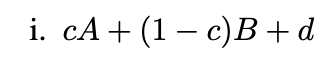

In [6]:
weighted_sum = cv2.addWeighted(A, c, B, 1-c, d)
logging.info(f'\ni. \nThe weighed sum is: \n {weighted_sum}')

2026-02-08 23:22:59,294 - 
i. 
The weighed sum is: 
 [[[7.45 0.85 4.65]
  [4.05 4.75 5.55]
  [7.45 5.45 2.15]]

 [[3.95 5.35 4.25]
  [5.25 4.25 8.65]
  [4.75 7.45 4.65]]

 [[4.75 4.65 8.65]
  [4.05 3.55 7.85]
  [7.35 3.25 2.95]]]


### ii
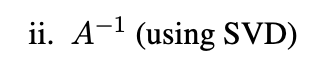

In [7]:
inverses = []
for _a in cv2.split(A_):
    w, u, vt = cv2.SVDecomp(_a)
    inv_a = vt.T @ np.diag(1 / w[:, 0]) @ u.T
    inverses.append(inv_a)

inverse_A = cv2.merge(inverses)
logging.info(f'\nii. \nThe inverse of A, when using SVD, is: \n {inverse_A}')

2026-02-08 23:22:59,299 - 
ii. 
The inverse of A, when using SVD, is: 
 [[[-1.0000005e+00 -1.0135134e-01  4.3333316e+00]
  [-2.9000010e+00  2.0270295e-02 -2.6666656e+00]
  [ 3.3000014e+00  1.7567565e-01  3.3333322e-01]]

 [[-1.0000002e+00  1.8243243e-01  1.9999992e+00]
  [-2.1000006e+00 -2.3648646e-01 -9.9999946e-01]
  [ 2.7000008e+00  2.8378376e-01 -6.2145446e-08]]

 [[ 1.0000002e+00 -1.3513520e-02 -1.7666660e+01]
  [ 2.4000006e+00  2.0270269e-01  1.0333329e+01]
  [-2.8000009e+00 -2.4324326e-01 -6.6666621e-01]]]


### iii
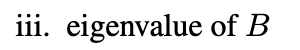

In [8]:
eigen_values = []
for _b in cv2.split(B_):
    _, eigen_value, eigen_vector = cv2.eigen(_b)
    eigen_values.append(eigen_value)

eigen_values_B = cv2.merge(eigen_values)
logging.info(f'\niii. \nThe eigenvalue of B is: \n {eigen_values_B}')

2026-02-08 23:22:59,305 - 
iii. 
The eigenvalue of B is: 
 [[[14.197403    4.561553   17.032358  ]]

 [[ 3.9999998   1.          4.8394666 ]]

 [[-1.1974022   0.43844712 -5.8718247 ]]]


### iv
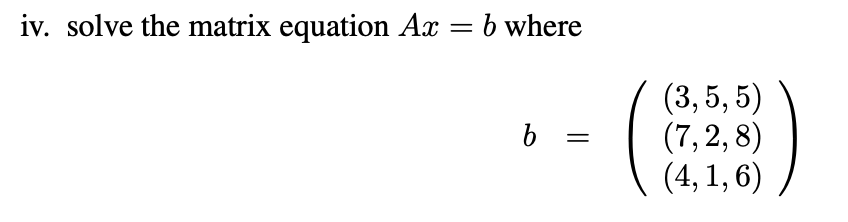

In [9]:
solutions = []
for _a in cv2.split(A_):
    _, sol = cv2.solve(_a, b)

    solutions.append(sol)

x = cv2.merge(solutions)
logging.info(f'\niv. \nThe solution x is: \n {x}')

2026-02-08 23:22:59,308 - 
iv. 
The solution x is: 
 [[[-1.0099999e+01  5.4054052e-01 -4.3333330e+00]
  [-7.4999986e+00 -2.9054055e-01  1.6666664e+01]
  [-8.3999987e+00  7.0945948e-01  2.3333323e+00]]

 [[-6.8999996e+00  2.7027031e-02 -9.9999958e-01]
  [-6.4999990e+00  7.2297305e-01  7.9999981e+00]
  [-5.5999994e+00  7.2297293e-01  1.9999995e+00]]

 [[ 8.5999994e+00  4.0540540e-01  1.6666664e+01]
  [ 6.9999990e+00  9.4594568e-02 -6.8333321e+01]
  [ 7.3999991e+00  9.4594628e-02 -9.6666622e+00]]]


## (d)
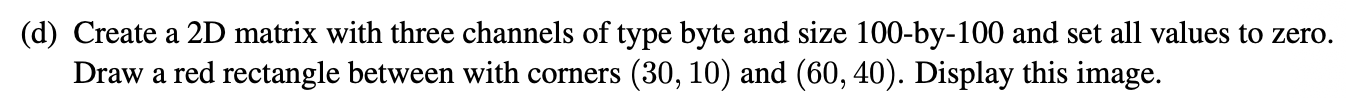

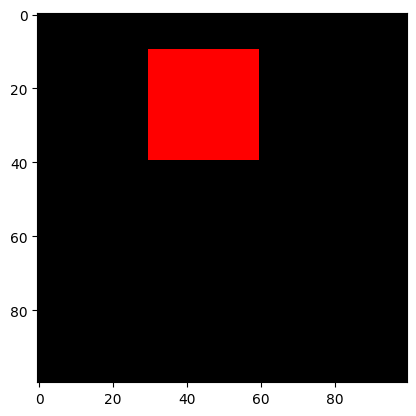

In [10]:
base_ = np.zeros((100, 100, 3), 
                 dtype=np.uint8)
base = cv2.Mat(base_)
base[10:40, 30:60, 0] = 255 

plt.imshow(base);

## (e)
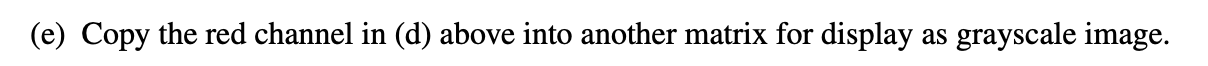

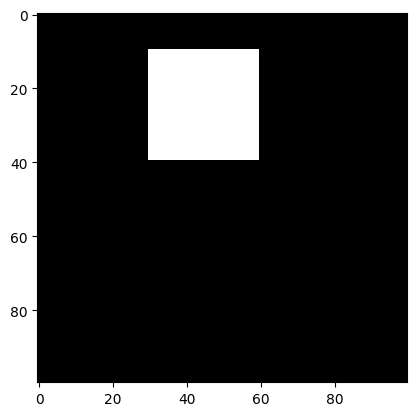

In [11]:
base = base[:, :, 0]

plt.imshow(base, cmap='gray');

# Item 2
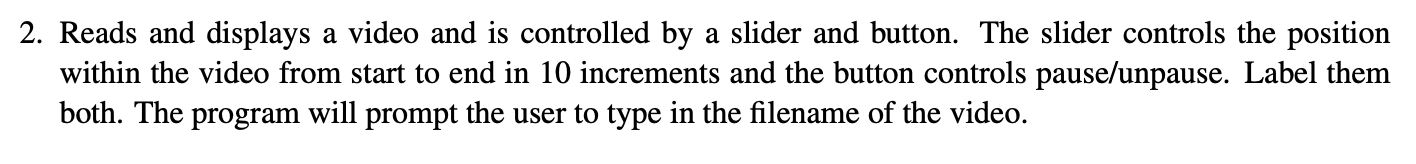

In [12]:

# !python src/video_player.py "cute_dog.mp4"

# Item 3
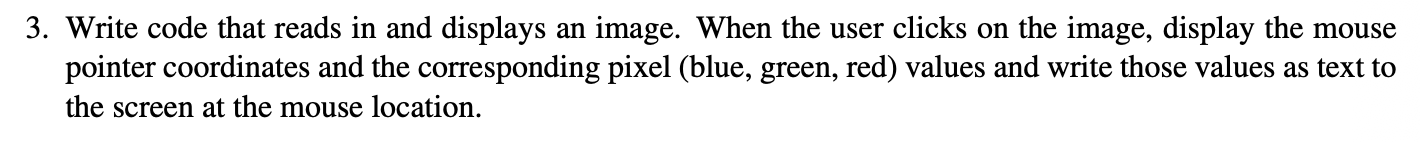

In [13]:
# !python src/image_clicker.py "PA1-Image_Enhancement/momandkids.jpg"

# Item 4
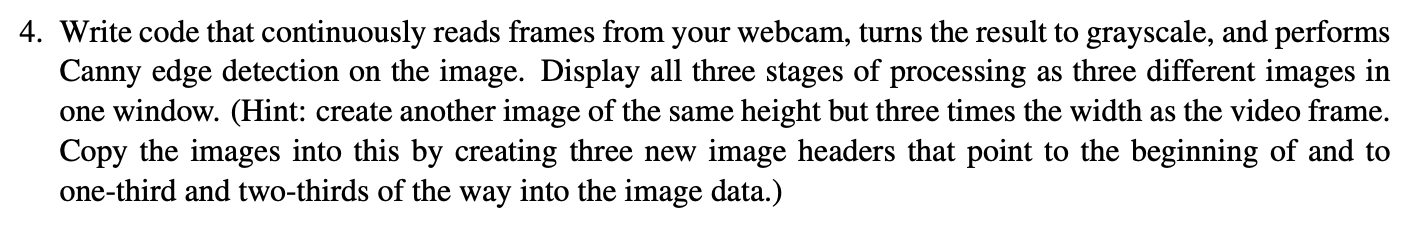

In [14]:
# !python src/grayscale_canny_edge.py

# Item 5
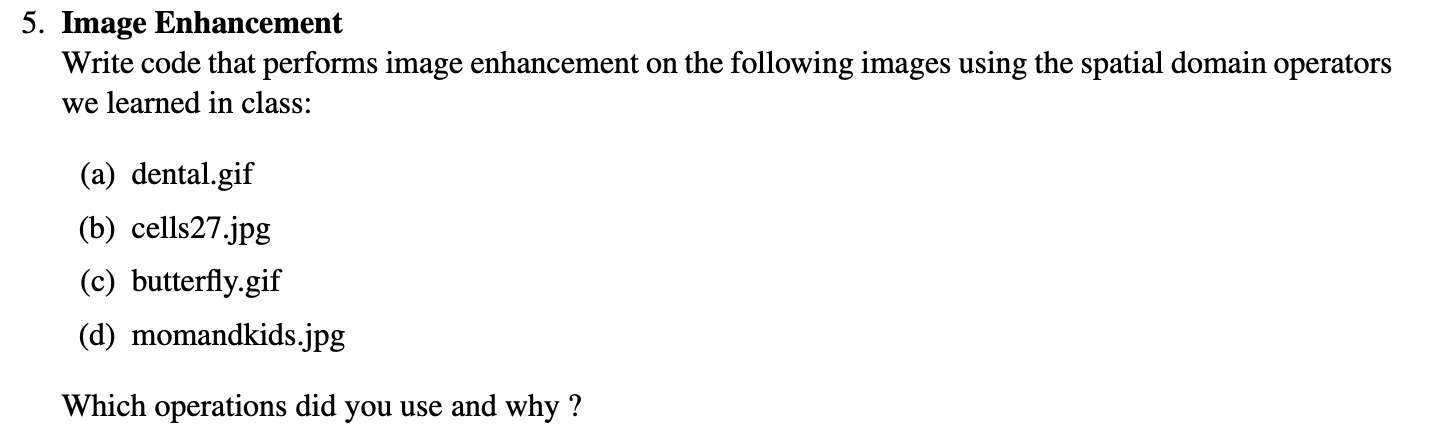

## a) dental.gif

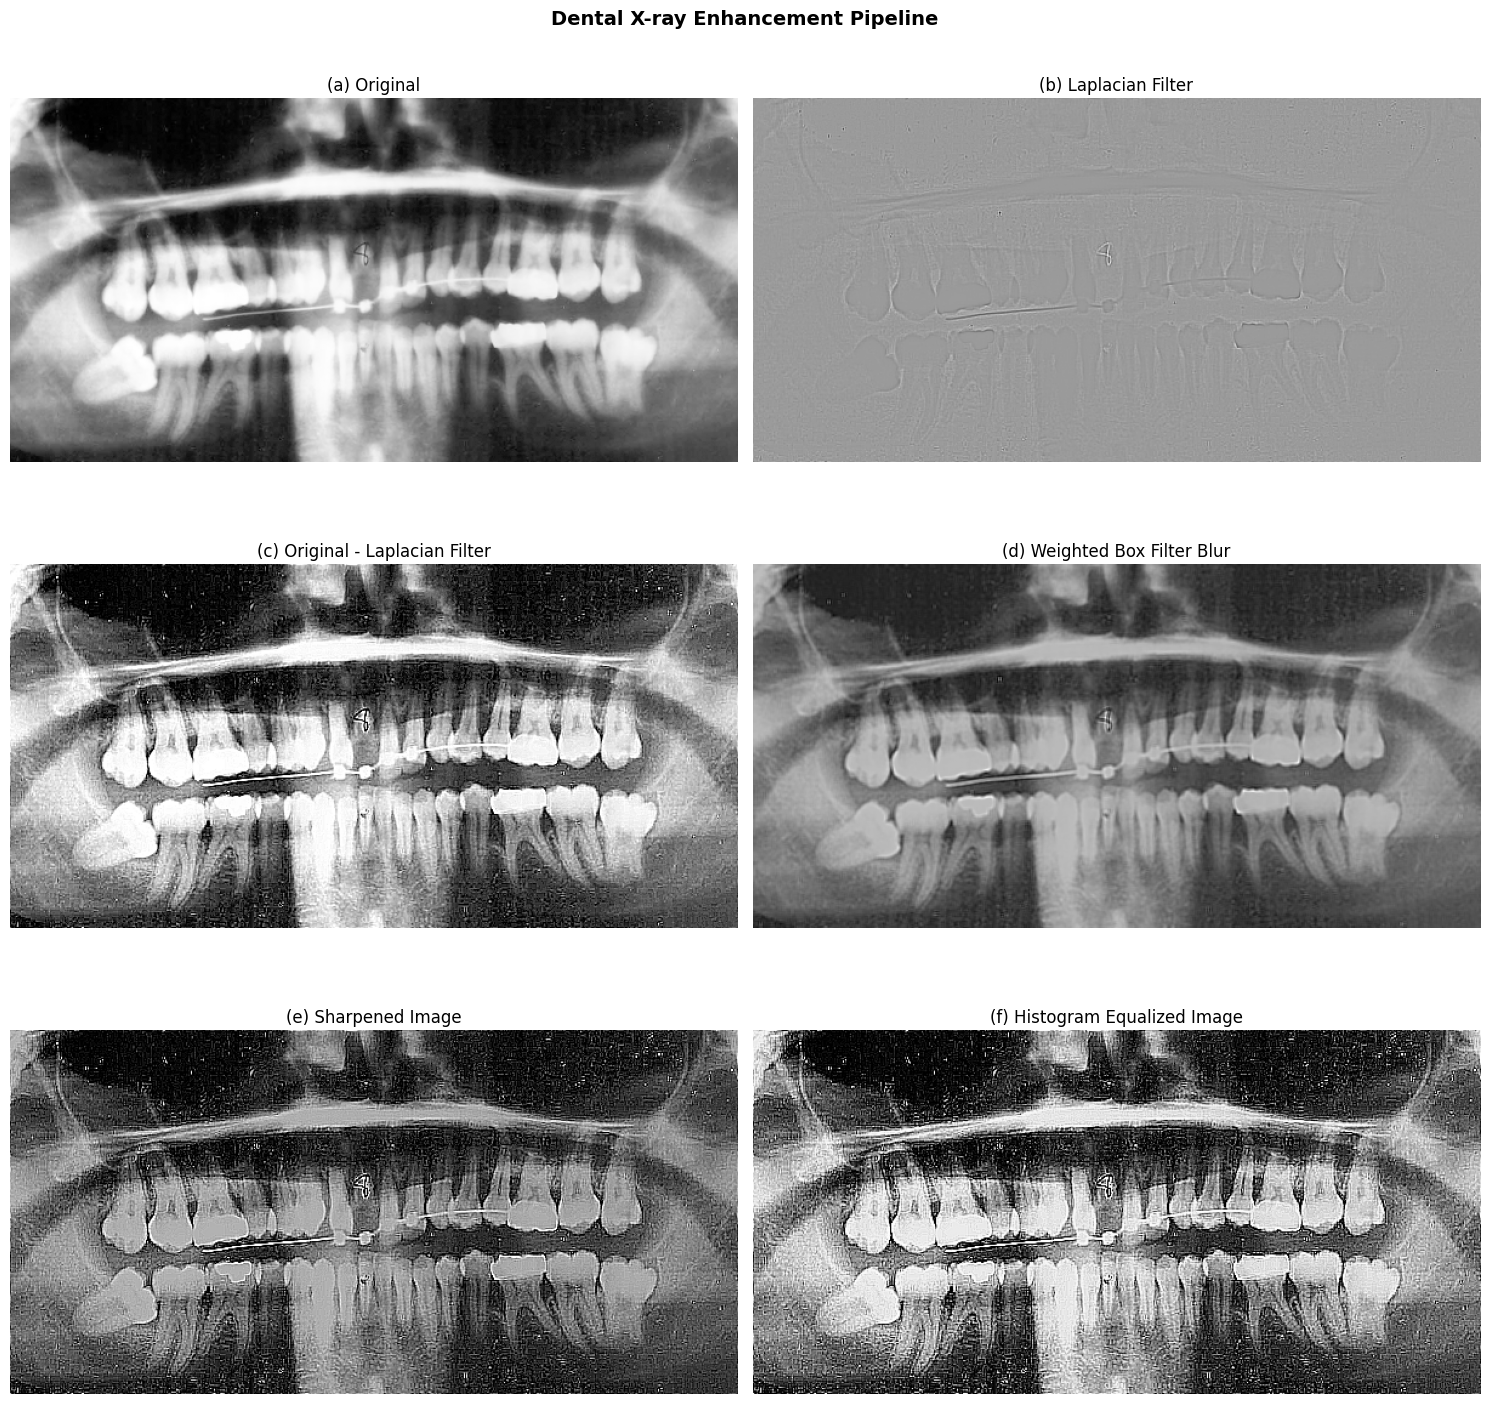

In [15]:
path = 'PA1-Image_Enhancement/dental.gif'

# Extract frame from GIF using VideoCapture
cap = cv2.VideoCapture(path)
ret, frame = cap.read()
cap.release()

laplacian_filter = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]], dtype=np.float64)

a = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float64)
b = cv2.filter2D(a, cv2.CV_64F, laplacian_filter)
c_raw = a - b
c = np.clip(c_raw, 0, 255).astype(np.uint8)
d = cv2.filter2D(c_raw, cv2.CV_64F, np.ones((3, 3), dtype=np.float64) / 9)
e = cv2.addWeighted(c_raw, 1.7, d, -1, 0)
e = np.clip(e, 0, 255).astype(np.uint8)
f = cv2.equalizeHist(e)


steps = {
    '(a) Original': a,
    '(b) Laplacian Filter': b,
    '(c) Original - Laplacian Filter': c,
    '(d) Weighted Box Filter Blur': d,
    '(e) Sharpened Image': e,
    '(f) Histogram Equalized Image': f
}

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, (title, img) in enumerate(steps.items()):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(title, fontsize=12)
    axes[idx].axis('off')

plt.suptitle('Dental X-ray Enhancement Pipeline', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## b) cells27.jpg

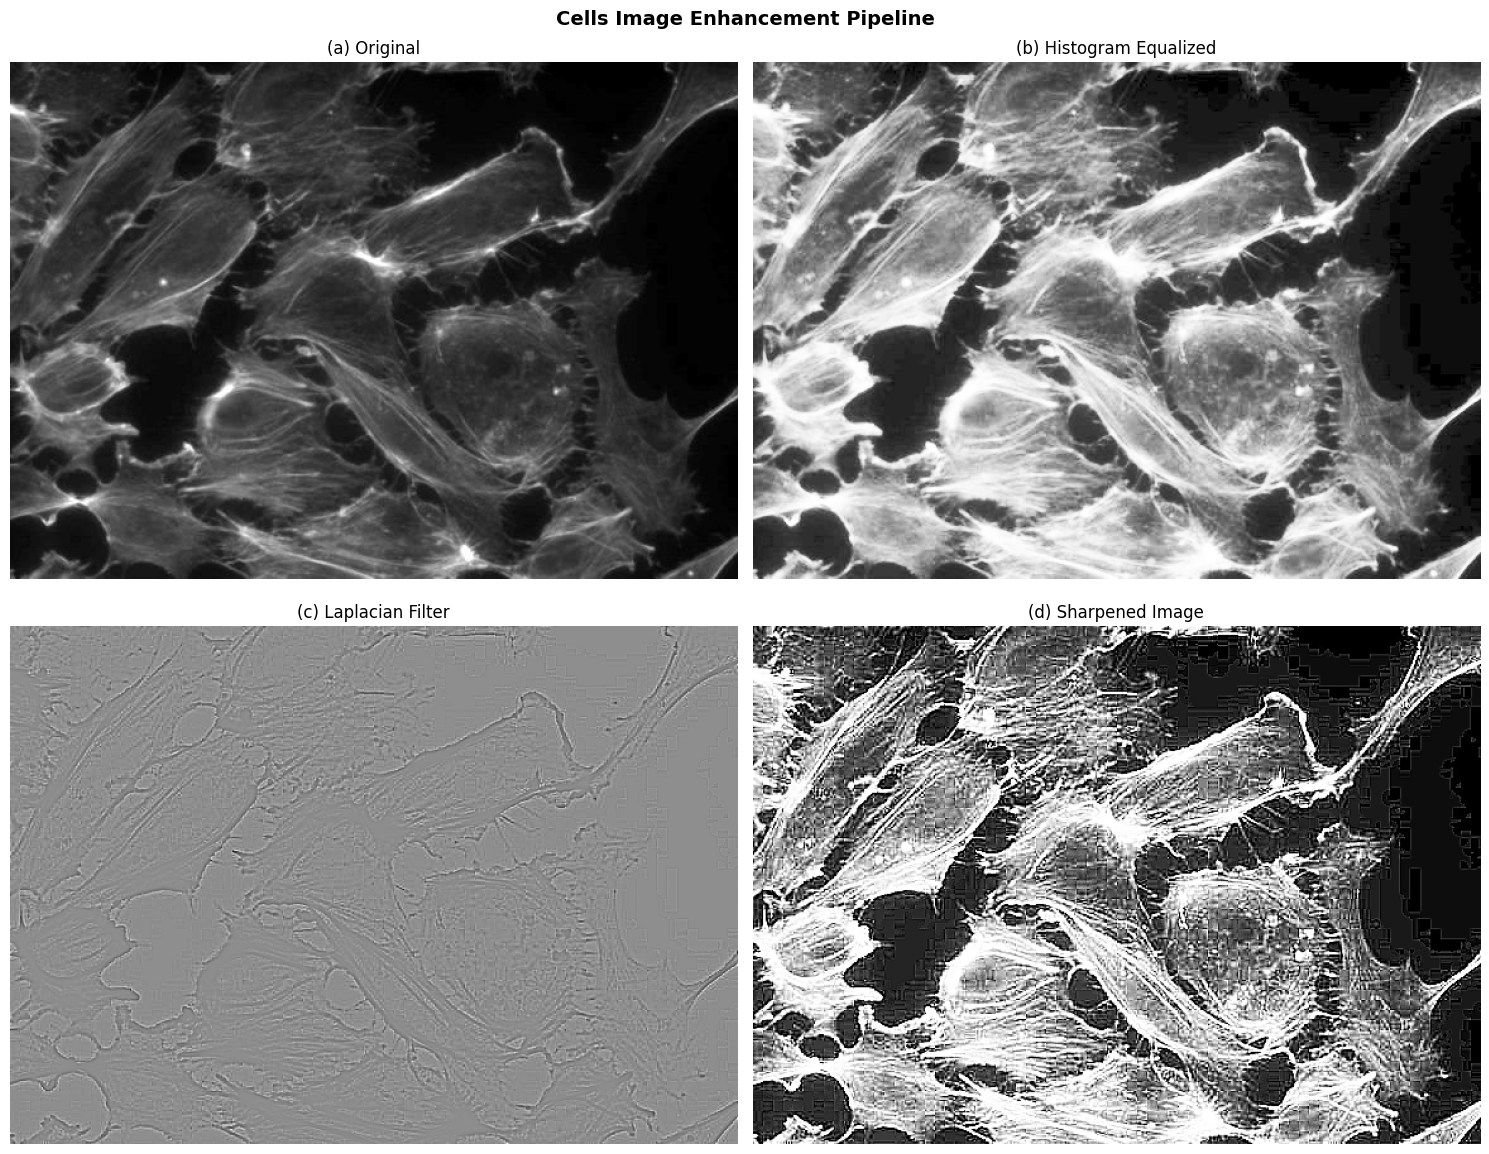

In [16]:
path = 'PA1-Image_Enhancement/cells27.jpg'

frame = cv2.imread(path)

laplacian_filter = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]], dtype=np.float64)

a = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float64)
b = cv2.equalizeHist(a.astype(np.uint8)).astype(np.float64)
c = cv2.filter2D(b, cv2.CV_64F, laplacian_filter)
d_raw = b - c
d = np.clip(d_raw, 0, 255).astype(np.uint8)



steps = {
    '(a) Original': a,
    '(b) Histogram Equalized': b,
    '(c) Laplacian Filter': c,
    '(d) Sharpened Image': d,
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, (title, img) in enumerate(steps.items()):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(title, fontsize=12)
    axes[idx].axis('off')

plt.suptitle('Cells Image Enhancement Pipeline', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## c) butterfly.gif

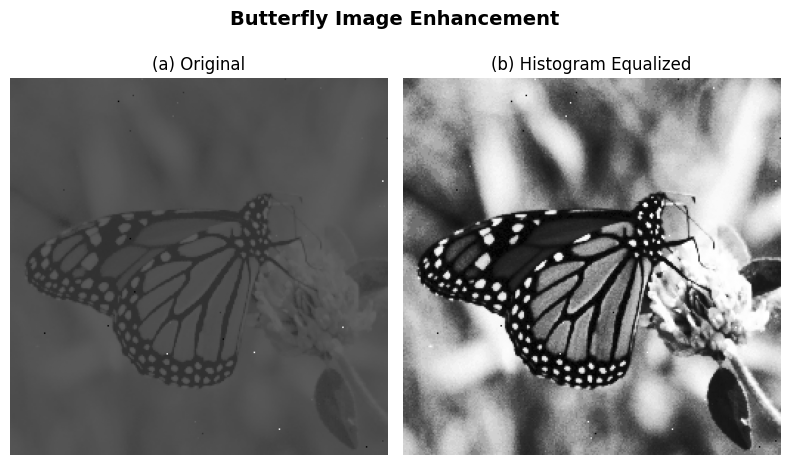

In [17]:
path = 'PA1-Image_Enhancement/butterfly.gif'

cap = cv2.VideoCapture(path)
ret, frame = cap.read()
cap.release()

a = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
b = cv2.equalizeHist(a.astype(np.uint8)).astype(np.float64)


steps = {
    '(a) Original': a,
    '(b) Histogram Equalized': b,
}

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes = axes.ravel()

for idx, (title, img) in enumerate(steps.items()):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(title, fontsize=12)
    axes[idx].axis('off')

plt.suptitle('Butterfly Image Enhancement', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## d) momandkids.jpg

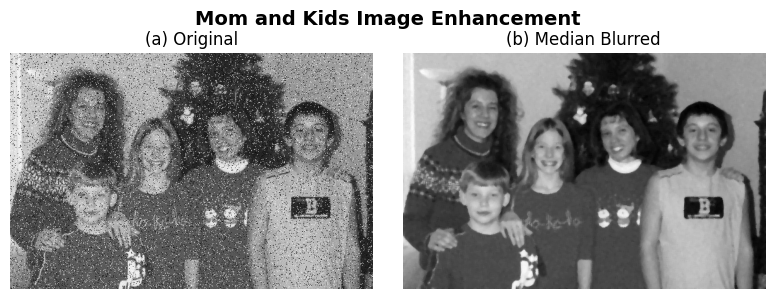

In [18]:
path = 'PA1-Image_Enhancement/momandkids.jpg'

frame = cv2.imread(path)

a = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype(np.float64)
b = cv2.medianBlur(a.astype(np.uint8), 5).astype(np.float64)

steps = {
    '(a) Original': a,
    '(b) Median Blurred': b,

}

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes = axes.ravel()

for idx, (title, img) in enumerate(steps.items()):
    axes[idx].imshow(img, cmap='gray')
    axes[idx].set_title(title, fontsize=12)
    axes[idx].axis('off')

plt.suptitle('Mom and Kids Image Enhancement', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
    

# Item 6
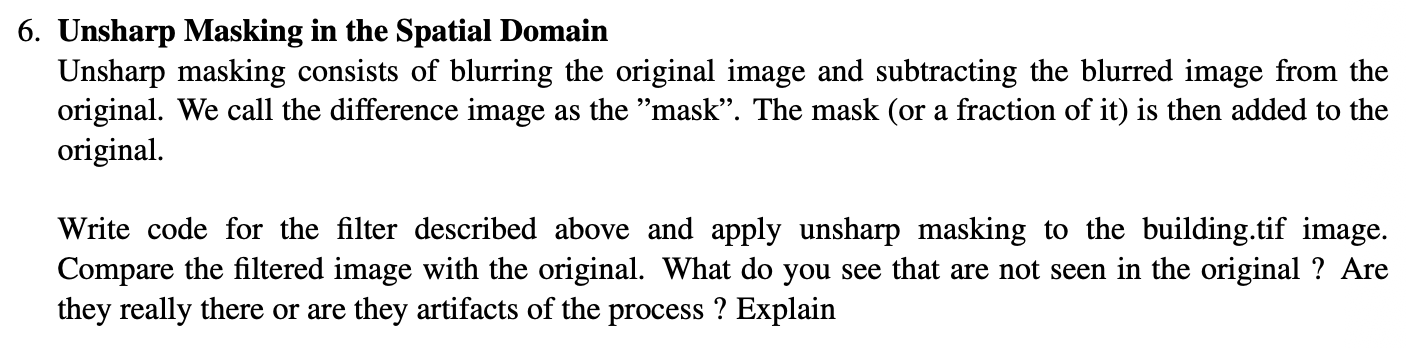

# Item 7
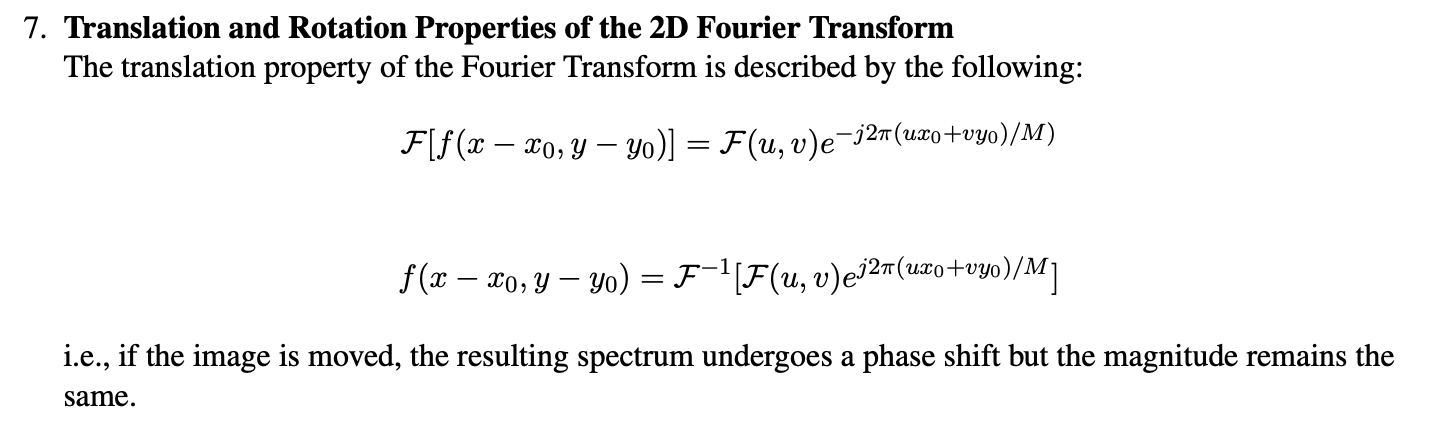
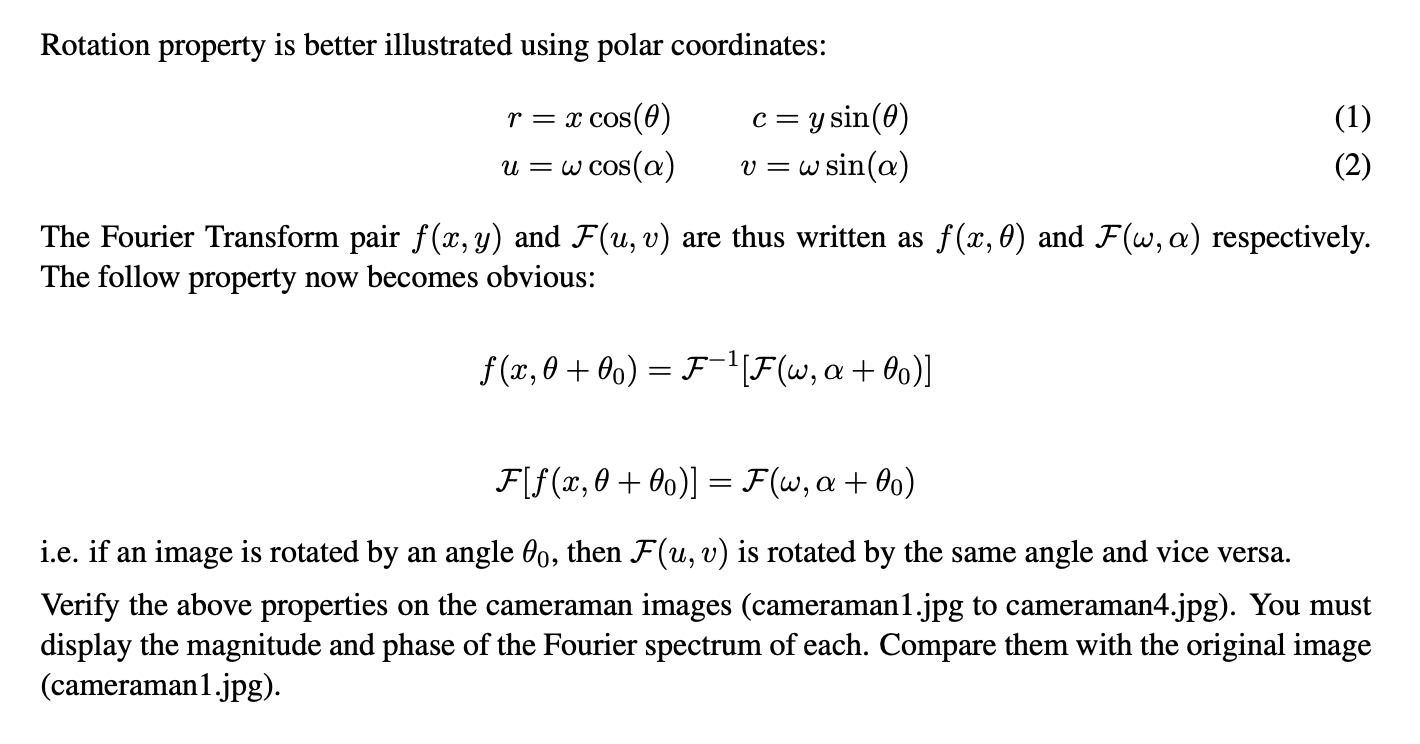

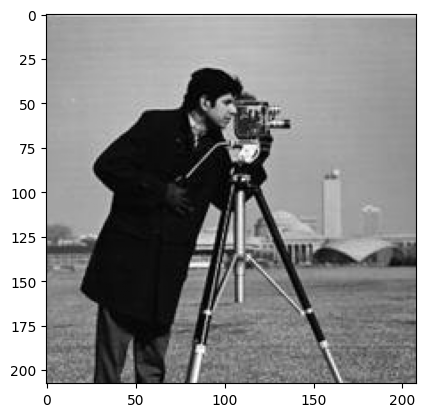

In [19]:
path = 'PA1-Image_Enhancement/cameraman1.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

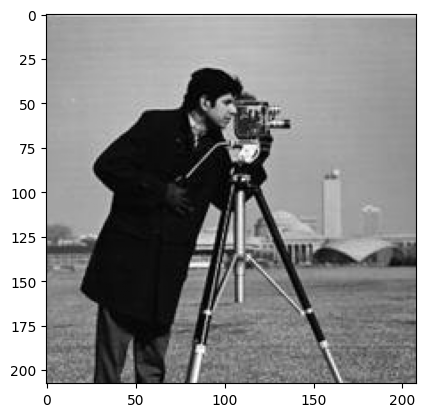

In [62]:
img = cv2.imread(path, 0)
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# mask = np.zeros((rows, cols), dtype=np.uint8)
# radius = 10
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# # mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 >= radius ** 2
# mask_area = center
# mask[mask_area] = 1
mask = np.ones((rows, cols), dtype=np.uint8)
# mask[crow:crow+1, ccol:ccol+1] = 0

fshift_filtered = fshift * mask

f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap='gray')


# plt.imshow(mask, cmap='gray')

In [ ]:
16 - 

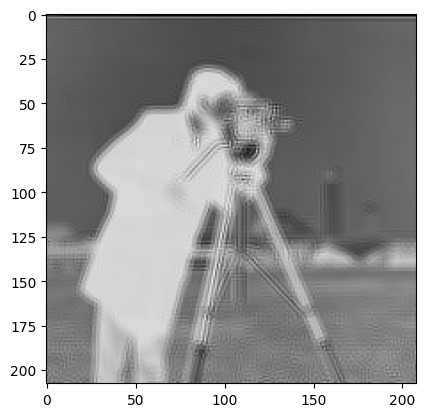

In [67]:
plt.imshow(img, cmap='gray')


kernel = -np.array([
    [1, 1, 1, 1, 1],
    [1, -2, -2, -2, 1],
    [1, -2, 10, -2, 1],
    [1, -2, -2, -2, 1],
    [1, 1, 1, 1, 1],
])

img_filter = cv2.filter2D(img, cv2.CV_64F, kernel)

plt.imshow(img_filter, cmap='gray')